# Implementar exemplos de Regressão Linear e Não Linear (1d) usando PyTorch.

## Regressão Linear:

--- Regressão Linear ---


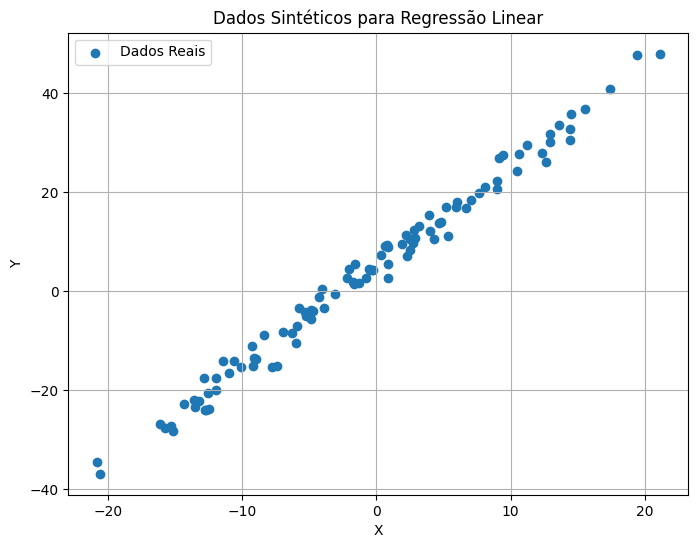

Epoch [100/1000], Loss: 5.0245
Epoch [200/1000], Loss: 4.4350
Epoch [300/1000], Loss: 4.4243
Epoch [400/1000], Loss: 4.4241
Epoch [500/1000], Loss: 4.4241
Epoch [600/1000], Loss: 4.4241
Epoch [700/1000], Loss: 4.4241
Epoch [800/1000], Loss: 4.4241
Epoch [900/1000], Loss: 4.4241
Epoch [1000/1000], Loss: 4.4241


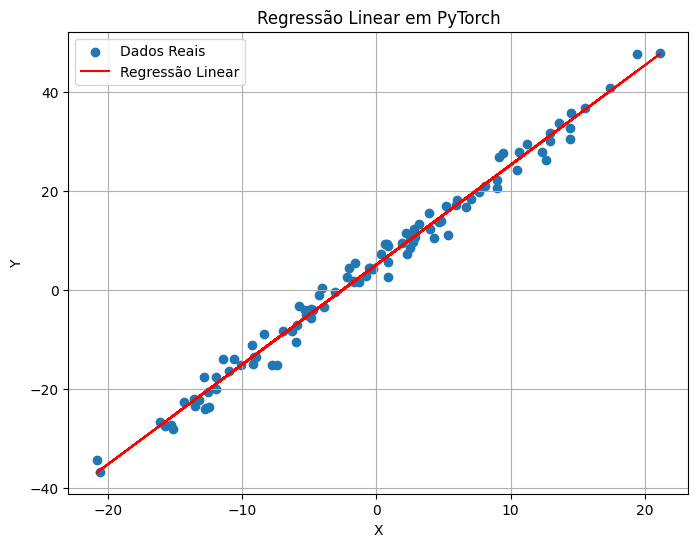

Coeficiente angular (a): 2.0183
Coeficiente linear (b): 5.1172


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

print("--- Regressão Linear ---")

# Gerar dados sintéticos para regressão linear
np.random.seed(0)
X_linear = torch.randn(100, 1) * 10  # 100 pontos de dados entre -10 e 10
y_linear = 2 * X_linear + 5 + torch.randn(100, 1) * 2  # y = 2x + 5 + ruído

# Visualizar os dados
plt.figure(figsize=(8, 6))
plt.scatter(X_linear.numpy(), y_linear.numpy(), label='Dados Reais')
plt.title('Dados Sintéticos para Regressão Linear')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# 1. Definir o Modelo
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # Uma entrada, uma saída

    def forward(self, x):
        return self.linear(x)

# Instanciar o modelo, definir a função de perda e o otimizador
model_linear = LinearRegression()
criterion_linear = nn.MSELoss()  # Erro Quadrático Médio
optimizer_linear = optim.SGD(model_linear.parameters(), lr=0.01) # Gradiente Descendente Estocástico

# 2. Treinar o Modelo
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model_linear(X_linear)
    loss = criterion_linear(outputs, y_linear)

    # Backward and optimize
    optimizer_linear.zero_grad()
    loss.backward()
    optimizer_linear.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 3. Visualizar os resultados
predicted_linear = model_linear(X_linear).detach().numpy() # .detach() para remover do grafo de computação
plt.figure(figsize=(8, 6))
plt.scatter(X_linear.numpy(), y_linear.numpy(), label='Dados Reais')
plt.plot(X_linear.numpy(), predicted_linear, color='red', label='Regressão Linear')
plt.title('Regressão Linear em PyTorch')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

print(f"Coeficiente angular (a): {model_linear.linear.weight.item():.4f}")
print(f"Coeficiente linear (b): {model_linear.linear.bias.item():.4f}")

## Regressão Não Linear:


--- Regressão Não Linear ---


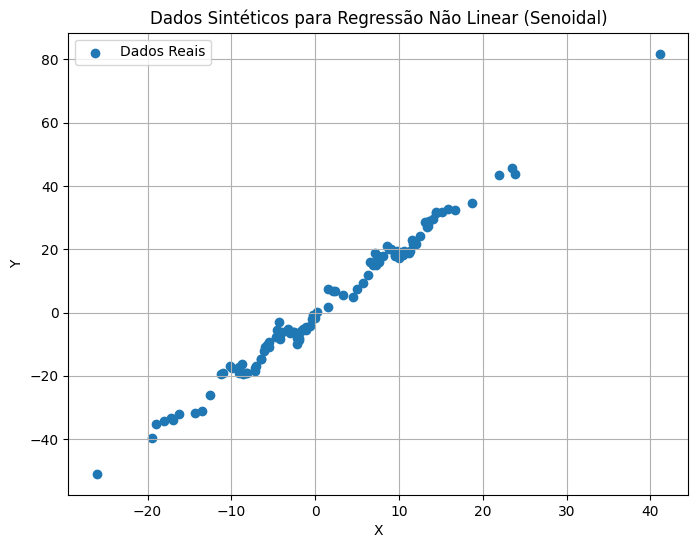

Epoch [500/5000], Loss: 5.3671
Epoch [1000/5000], Loss: 5.2288
Epoch [1500/5000], Loss: 5.1744
Epoch [2000/5000], Loss: 5.1403
Epoch [2500/5000], Loss: 5.0968
Epoch [3000/5000], Loss: 5.0447
Epoch [3500/5000], Loss: 4.9690
Epoch [4000/5000], Loss: 4.8889
Epoch [4500/5000], Loss: 4.8103
Epoch [5000/5000], Loss: 4.7451


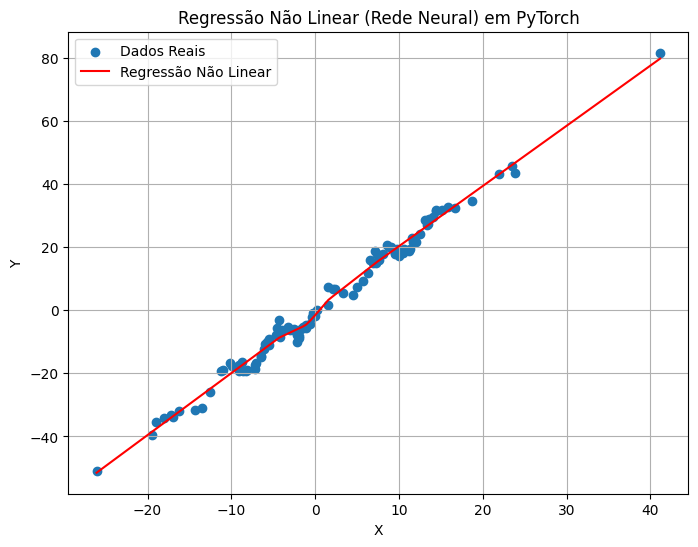

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

print("\n--- Regressão Não Linear ---")

# Gerar dados sintéticos para regressão não linear (ex: senoidal)
np.random.seed(0)
X_nonlinear = torch.randn(100, 1) * 10
y_nonlinear = 3 * torch.sin(X_nonlinear) + 2 * X_nonlinear + torch.randn(100, 1) * 1.5

# Visualizar os dados
plt.figure(figsize=(8, 6))
plt.scatter(X_nonlinear.numpy(), y_nonlinear.numpy(), label='Dados Reais')
plt.title('Dados Sintéticos para Regressão Não Linear (Senoidal)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# 1. Definir o Modelo Não Linear (uma rede neural simples)
class NonLinearRegression(nn.Module):
    def __init__(self):
        super(NonLinearRegression, self).__init__()
        self.fc1 = nn.Linear(1, 64)  # Camada de entrada para camada oculta
        self.relu = nn.ReLU()       # Função de ativação (ReLU)
        self.fc2 = nn.Linear(64, 1) # Camada oculta para camada de saída

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Instanciar o modelo, definir a função de perda e o otimizador
model_nonlinear = NonLinearRegression()
criterion_nonlinear = nn.MSELoss()
optimizer_nonlinear = optim.Adam(model_nonlinear.parameters(), lr=0.001) # Adam costuma ser bom para redes neurais

# 2. Treinar o Modelo
num_epochs_nonlinear = 5000
for epoch in range(num_epochs_nonlinear):
    # Forward pass
    outputs = model_nonlinear(X_nonlinear)
    loss = criterion_nonlinear(outputs, y_nonlinear)

    # Backward and optimize
    optimizer_nonlinear.zero_grad()
    loss.backward()
    optimizer_nonlinear.step()

    if (epoch+1) % 500 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs_nonlinear}], Loss: {loss.item():.4f}')

# 3. Visualizar os resultados
# Precisamos ordenar os X para que a linha plotada faça sentido
X_nonlinear_sorted, _ = torch.sort(X_nonlinear, dim=0)
with torch.no_grad(): # Desativa o cálculo de gradientes para a inferência
    predicted_nonlinear = model_nonlinear(X_nonlinear_sorted).numpy()

plt.figure(figsize=(8, 6))
plt.scatter(X_nonlinear.numpy(), y_nonlinear.numpy(), label='Dados Reais')
plt.plot(X_nonlinear_sorted.numpy(), predicted_nonlinear, color='red', label='Regressão Não Linear')
plt.title('Regressão Não Linear (Rede Neural) em PyTorch')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()